,revolutions,humidity,vibration
0,93.744,73.999,18.0
1,93.740,73.999,18.0
2,93.736,73.998,18.0
3,93.732,73.998,18.0
4,93.729,73.998,18.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   revolutions  112001 non-null  float64
 1   humidity     112001 non-null  float64
 2   vibration    109563 non-null  float64
dtypes: float64(3)
memory usage: 2.6 MB


None

C:\Users\VICKY\AppData\Local\Temp\ipykernel_24104\3085155582.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols].copy())


Mean Absolute Error: 13.9279
Mean Squared Error: 556.1842
R² Score: 0.0520


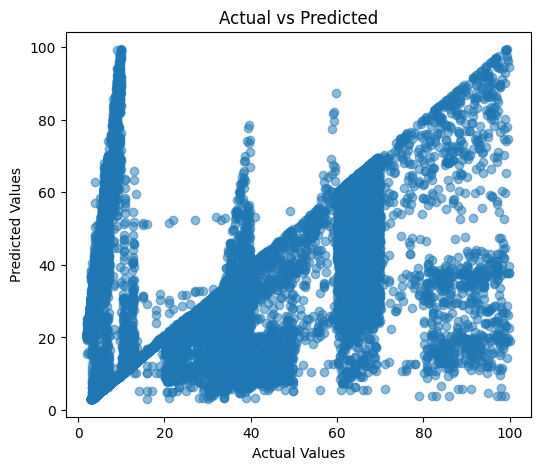

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\VICKY\Downloads\IoT J Comp\predictive_maintenance.xlsx'
df = pd.read_excel(file_path)

# Display basic info
display(df.head())
display(df.info())

# Handle missing values
df.dropna(inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'vibration' exists before processing
if 'vibration' in numerical_cols:
    numerical_cols.remove('vibration')

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features and target (assuming the last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols].copy())

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (RandomForestRegressor for continuous target)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')

# Visualize actual vs predicted values
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()



,revolutions,humidity,vibration
0,93.744,73.999,18.0
1,93.740,73.999,18.0
2,93.736,73.998,18.0
3,93.732,73.998,18.0
4,93.729,73.998,18.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   revolutions  112001 non-null  float64
 1   humidity     112001 non-null  float64
 2   vibration    109563 non-null  float64
dtypes: float64(3)
memory usage: 2.6 MB


None

C:\Users\VICKY\AppData\Local\Temp\ipykernel_24104\4212708673.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols].copy())


Mean Absolute Error: 13.4675
Mean Squared Error: 350.7367
R² Score: 0.4022
MAPE: 128.5847%


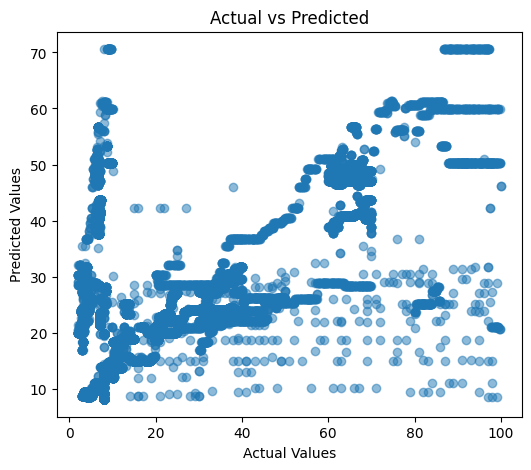

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\VICKY\Downloads\IoT J Comp\predictive_maintenance.xlsx'
df = pd.read_excel(file_path)

# Display basic info
display(df.head())
display(df.info())

# Handle missing values
df.dropna(inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'vibration' exists before processing
if 'vibration' in numerical_cols:
    numerical_cols.remove('vibration')

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features and target (assuming the last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols].copy())

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (GradientBoostingRegressor for continuous target)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE) for accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'MAPE: {mape:.4f}%')

# Visualize actual vs predicted values
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\VICKY\Downloads\IoT J Comp\predictive-maintenance-dataset.csv'
df = pd.read_excel(file_path)

# Display basic info
display(df.head())
display(df.info())

# Handle missing values
df.dropna(inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'vibration' exists before processing
if 'vibration' in numerical_cols:
    numerical_cols.remove('vibration')

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features and target (assuming the last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols].copy())

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (LGBMRegressor for continuous target)
model = LGBMRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')

# Visualize actual vs predicted values
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


ModuleNotFoundError: No module named 'lightgbm'